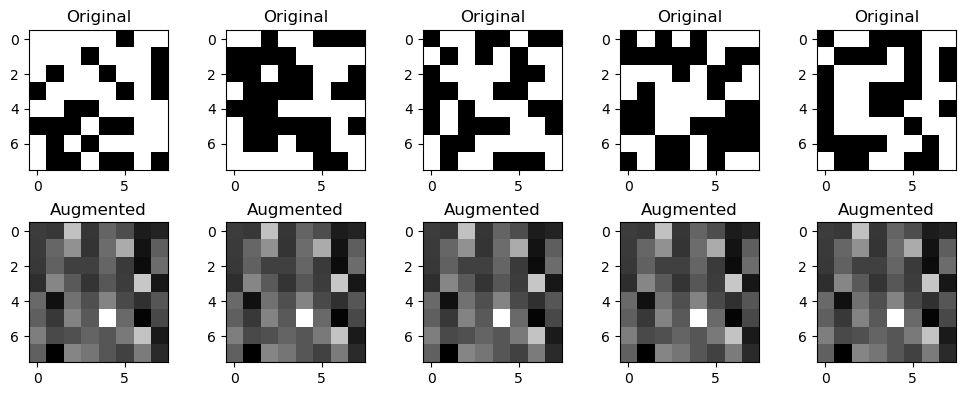

In [1]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
import matplotlib.pyplot as plt
# Generate a sample dataset of images (you would use actual images in practice)
num_samples = 100
image_size = 8 * 8
original_images = np.random.randint(0, 2, size=(num_samples, image_size))
# Define a deep RBM with two hidden layers
rbm = BernoulliRBM(n_components=64, n_iter=10, batch_size=10)
rbm2 = BernoulliRBM(n_components=64, n_iter=10, batch_size=10)
# Fit the RBM layers
rbm.fit(original_images)
hidden_features = rbm.transform(original_images)
rbm2.fit(hidden_features)
augmented_features = rbm2.transform(hidden_features)
# Reconstruct augmented images
reconstructed_hidden_features = rbm.transform(augmented_features)
reconstructed_hidden_features_transformed = rbm.transform(reconstructed_hidden_features)
reconstructed_images = rbm.transform(reconstructed_hidden_features_transformed)
# Plot original and augmented images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(original_images[i].reshape(8, 8), cmap='gray')
    plt.title("Original")
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_images[i].reshape(8, 8), cmap='gray')
    plt.title("Augmented")
plt.tight_layout()
plt.show()